# Facial Expressions Recognition

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Image](https://www.duarte.com/wp-content/uploads/Facial-Expression_1.png)

### Dataset

The dataset used in this project is the fer2013 dataset. The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image. You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/msambare/fer2013).

### Objective

The objective of this project is to build a convolutional neural network model that can recognize human facial expressions.

## Import Libraries

Pada project ini library utama yang digunakan adalah **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, **Tensorflow**, dan **Keras**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Data Loading

Pada bagian ini data gambar akan di load menggunakan `ImageDataGenerator`.

In [2]:
train_path = 'dataset/train/'
test_path = 'dataset/test/'

In [3]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True, vertical_flip=True, validation_split=0.3)
test_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_gen.flow_from_directory(train_path, target_size=(48, 48), batch_size=23, class_mode='categorical', color_mode='grayscale', subset='training')
valid_data = train_gen.flow_from_directory(train_path, target_size=(48, 48), batch_size=23, class_mode='categorical', color_mode='grayscale', subset='validation')
test_data = test_gen.flow_from_directory(test_path, target_size=(48, 48), batch_size=23, class_mode='categorical', color_mode='grayscale', shuffle=False)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
classes = list(train_data.class_indices.keys())
print(f'Classes: {classes}')

Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Pada dataset ini terdapat **7 kelas** yang berbeda, yaitu:
- Angry
- Disgust
- Fear
- Happy
- Neutral
- Sad
- Surprise

## Exploratory Data Analysis

In [6]:
for dirpath, dirnames, filenames in os.walk(train_path):
  print(f'Found {len(dirnames)} folders with {len(filenames)} images in {dirpath}')

Found 7 folders with 0 images in dataset/train/
Found 0 folders with 3995 images in dataset/train/angry
Found 0 folders with 436 images in dataset/train/disgust
Found 0 folders with 4097 images in dataset/train/fear
Found 0 folders with 7215 images in dataset/train/happy
Found 0 folders with 4965 images in dataset/train/neutral
Found 0 folders with 4830 images in dataset/train/sad
Found 0 folders with 3171 images in dataset/train/surprise


In [7]:
for dirpath, dirnames, filenames in os.walk(test_path):
  print(f'Found {len(dirnames)} folders with {len(filenames)} images in {dirpath}')

Found 7 folders with 0 images in dataset/test/
Found 0 folders with 958 images in dataset/test/angry
Found 0 folders with 111 images in dataset/test/disgust
Found 0 folders with 1024 images in dataset/test/fear
Found 0 folders with 1774 images in dataset/test/happy
Found 0 folders with 1233 images in dataset/test/neutral
Found 0 folders with 1247 images in dataset/test/sad
Found 0 folders with 831 images in dataset/test/surprise


Jika dilihat dari jumlah datanya, kelas **disgust** memiliki jumlah data paling sedikit diantara kelas-kelas lainnya. Dimana pada training set hanya sebanyak **436 gambar** sedangakan pada testing set hanya sebanyak **111 gambar** saja.

### Sample Images

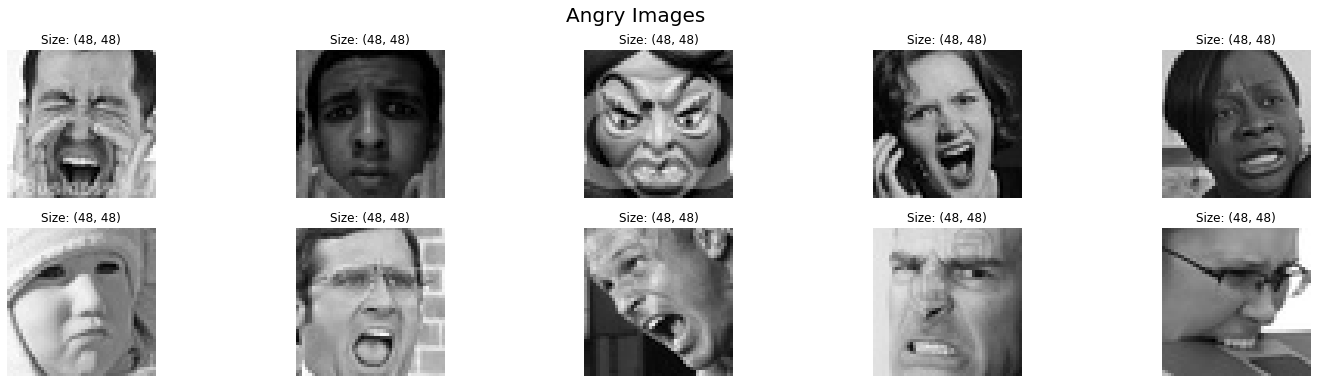

In [8]:
plt.figure(figsize=(25, 6))
plt.suptitle('Angry Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'angry/'), 1)
    img = image.load_img(train_path + 'angry/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

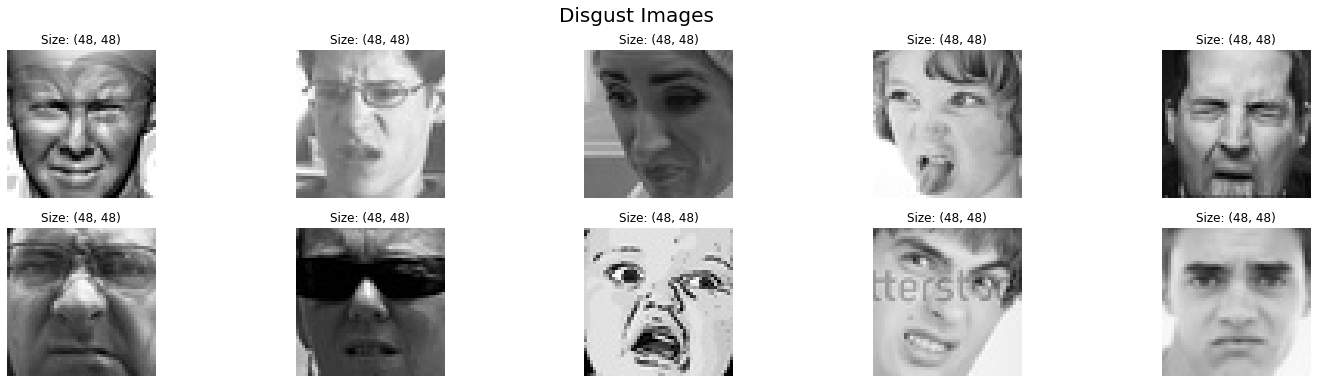

In [10]:
plt.figure(figsize=(25, 6))
plt.suptitle('Disgust Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'disgust/'), 1)
    img = image.load_img(train_path + 'disgust/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

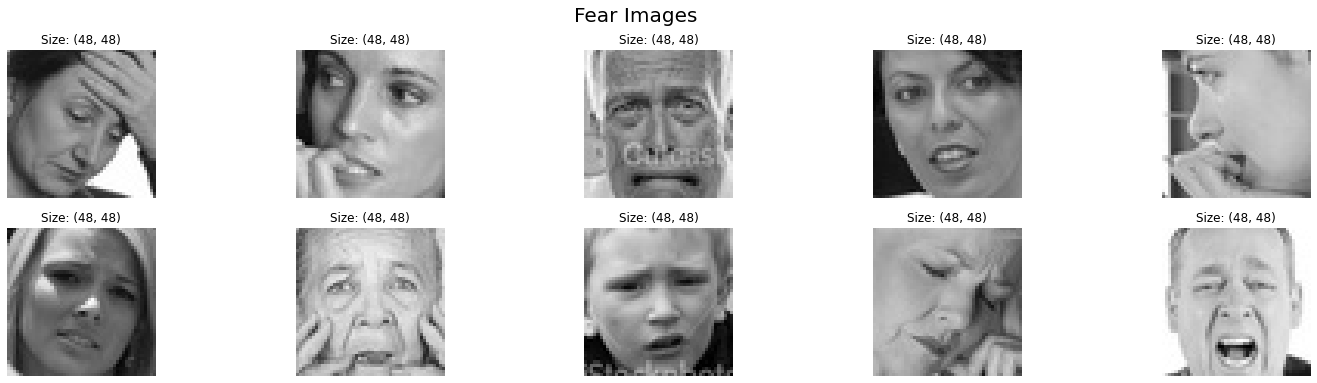

In [11]:
plt.figure(figsize=(25, 6))
plt.suptitle('Fear Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'fear/'), 1)
    img = image.load_img(train_path + 'fear/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

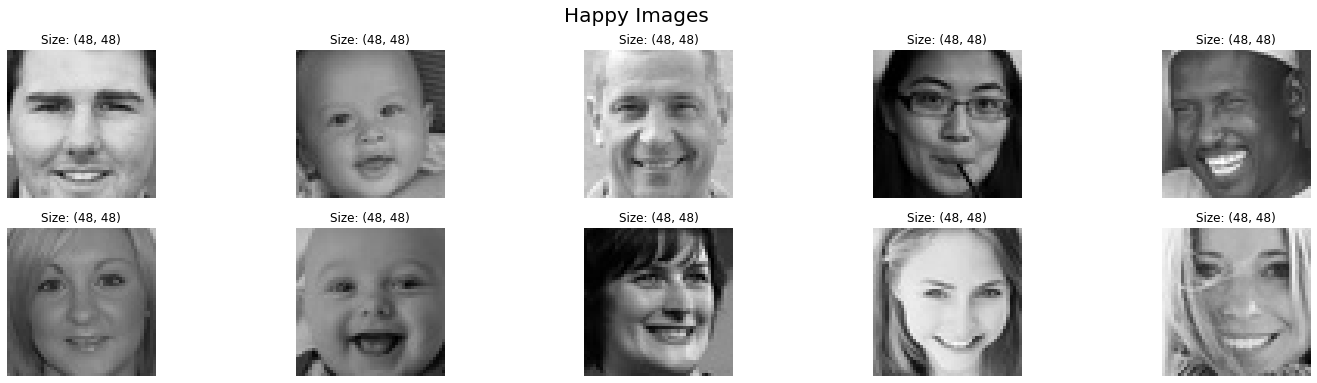

In [12]:
plt.figure(figsize=(25, 6))
plt.suptitle('Happy Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'happy/'), 1)
    img = image.load_img(train_path + 'happy/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

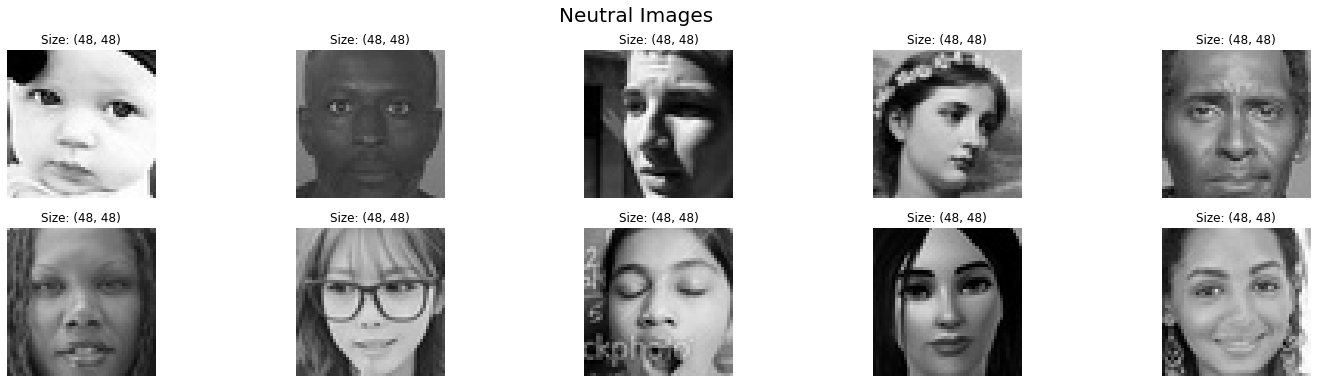

In [13]:
plt.figure(figsize=(25, 6))
plt.suptitle('Neutral Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'neutral/'), 1)
    img = image.load_img(train_path + 'neutral/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

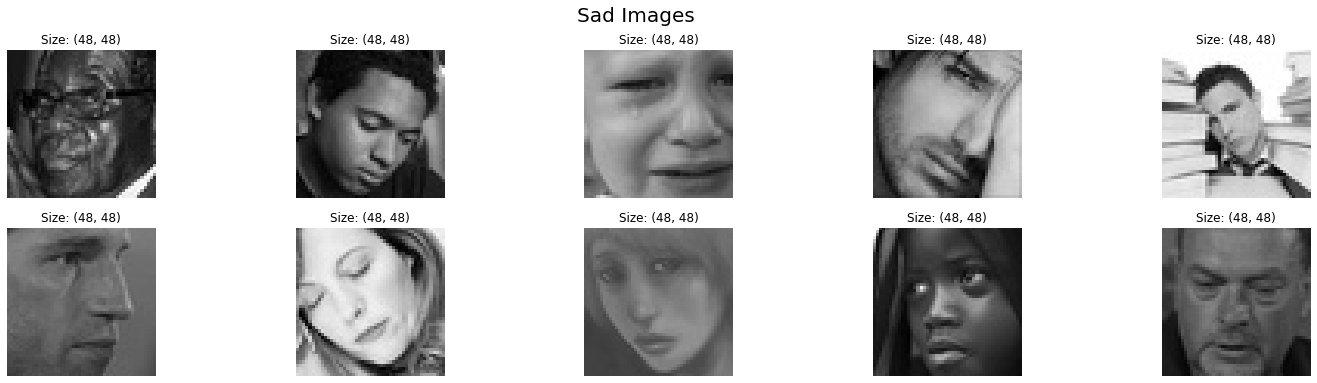

In [14]:
plt.figure(figsize=(25, 6))
plt.suptitle('Sad Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'sad/'), 1)
    img = image.load_img(train_path + 'sad/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

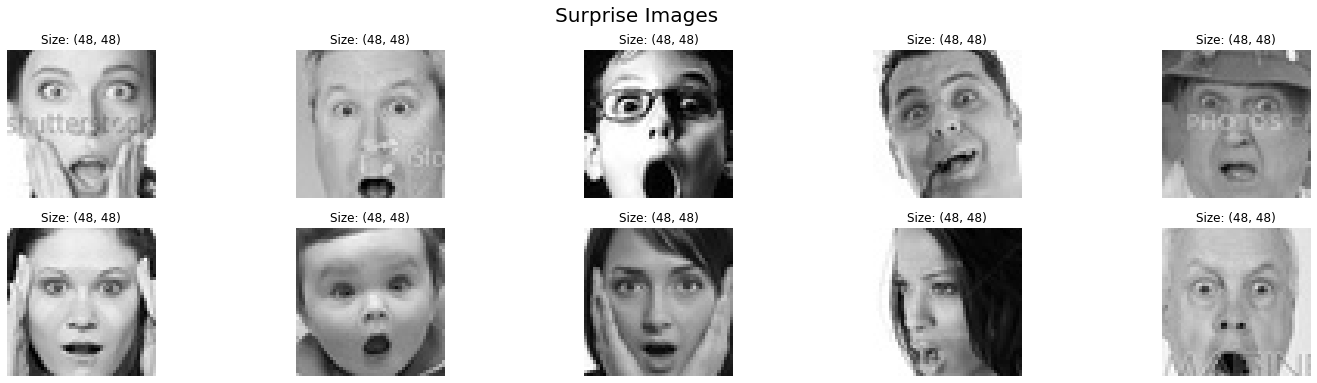

In [15]:
plt.figure(figsize=(25, 6))
plt.suptitle('Surprise Images', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    random_img = random.sample(os.listdir(train_path + 'surprise/'), 1)
    img = image.load_img(train_path + 'surprise/' + random_img[0])
    plt.imshow(img)
    plt.title(f'Size: {img.size}')
    plt.axis('off')
plt.show()

Jika dilihat semua gambar sudah memiliki ukuran yang sama yaitu **48x48 pixel**.